In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Classification

In supervised machine learning, we have some data, $X$ and some labels $y$ associated with $X$. The goal is learn a mapping f(X) -> y. 

If y is a continuous variable, this type of procedure is known as regression. However, if y takes on discrete values, such as 1 or 0, or one of $k$ values, this procedure is known as classification. In the special case where there are only 2 states that y can take, this is known as binary classification

In many cases, we'd like y to represent the probability of an event occuring. We could use linear regression to do this!

![](./assets/notlinear.png)
ISL: http://www-bcf.usc.edu/~gareth/ISL

# Logistic Regression

Logistic regression is one of the most popular binary classification algorithms and is related to linear regression. It belongs to a class of models known as *generalized linear models* or GLMs. 

## The Logistic Function


Before we see the full model specification for logistic regression, let's first take a look at the logistic function, from which logistic regression derives its name. 

$$\sigma(x) = \frac{e^x}{1+e^x}$$


Note that this is also equivalent to the following:
$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [8]:
x = np.linspace(-10, 10, 1000)
y = np.exp(x)/(1+np.exp(x))

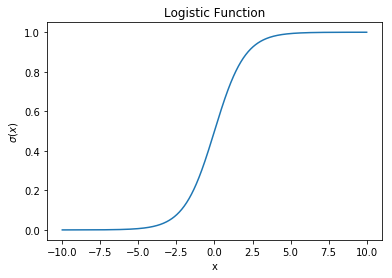

In [9]:
plt.plot(x, y)
plt.title('Logistic Function')
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.show()

## Logistic Regression

$$ P(y=1|x) = \frac{e^{\textbf{w}^T \textbf{x}}}{1 + e^{\textbf{w}^T\textbf{x}}} $$

$$ P(y = 0 | x) = 1 - \frac{e^{\textbf{w}^T \textbf{x}}}{1 + e^{\textbf{w}^T\textbf{x}}} $$

$$ =  \frac{1 + e^{\textbf{w}^T\textbf{x}}}{1 + e^{\textbf{w}^T\textbf{x}}} - \frac{e^{\textbf{w}^T \textbf{x}}}{1 + e^{\textbf{w}^T\textbf{x}}}$$

$$  = \frac{1}{1+e^{\textbf{w}^T\textbf{x}}} $$

$$ \frac{p(y=1|x)}{p(y=0|x)} = e^{\textbf{w}^T\textbf{x}} $$

The term 
$$ \frac{p(y =1|x)}{p(y=0|x)} $$ or more generally $$ \frac{p}{1-p}$$  is known as *odds*. Odds can take values between 0 and $\infty$. This is used predominantly in betting. For example, a probability of 0.2 corresponds to odds of 1:4.

If we take the logarithm of both sides, we're left with 
$$ \log \frac{p}{1-p} = \textbf{w}^T\textbf{x} $$

which looks like linear regression!

The right hand side, in statistical notation, is 

$$ \beta_0 + \beta_1x_1 + \beta_2x_2 ... $$

## Interpretation of coefficients

#### Odds Ratio

$$ y_1 = e^{\beta_0 + \beta_1x_1 + \beta_2x_2} $$

$$ y_2 = e^{\beta_0 + \beta_1(x_1+1) + \beta_2x2}$$

$$ \frac{y_2}{y_1} = \frac{e^{\beta_0 + \beta_1(x_1+1) + \beta_2x_2}}{e^{\beta_0 + \beta_1x_1 + \beta_2x_2}}$$

$$\frac{y_2}{y_1} = e^{\beta_1}$$

Where $\frac{y_2}{y_1}$ is the *odds ratio*

#### log Odds

$$\log \frac{p}{1-p} = \beta_0 + \beta_1x_1 + \beta_2x_2 $$

____

# Gradient Descent

How do we estimate the weights, _w_ or coefficients, $\beta$? Minimize the loss! (Or equivalently, maximize the likelihood)

As a reminder, the gradient, $\nabla$, is defined as a vector of the partial derivatives of a function with respect to the dimensions in question.

Specifically, we are interested in the gradient of the loss function with respect to each of the parameters of the model. For example, if we have a loss function:

$$ l(w) $$

and a model $$ y = w_0 + w_1x_1 + w_2x_2$$
The gradient $\nabla l$ can be written as

$$ \begin{bmatrix} \frac{\partial l}{\partial w_0} \\ \frac{\partial l}{\partial w_1} \\ \frac{\partial l}{\partial w_2} \end{bmatrix} $$

Here, we introduce the algorithm known as Gradient Descent/Gradient Ascent. The gradient 

$$ \nabla F(\textbf{x})$$ points in the direction of steepest ascent for F. 

![](./assets/steepest.png)
Bamshad Mabasher
DePaul University

![](./assets/steepest_ascent.png)

$$ P(y=1|X) = \frac{1}{1+e^{-\textbf{w}^T\textbf{x}}}$$

Here, $\textbf{w}$ is made up of a bias term, $b$ and weights $w_i$ from $i = 1...j$

For logistic regression, we use the *cross-entropy* loss, which is given by 

$$loss =  -y \log \sigma(\textbf{w}^T\textbf{x}) + (1-y) \log (1 - \sigma(\textbf{w}^T\textbf{x})) $$

What we would like to do is to get the average loss over all y's and x's. Here, I've omitted the negative sign out front, to turn this into a likelihood maximization problem. So we get the following expression:

$$\frac{1}{m}\sum_{i=1}^{m}y^{(i)} \log \sigma(\textbf{w}^T\textbf{x}^{(i)}) + (1-y^{(i)}) \log (1- \sigma(\textbf{w}^T\textbf{x}^{(i)}) $$

for $i = 1...m$ training examples

Now, we need to take the gradient of this function with respect to each of our weights.



Before we do that, here is a convenient mathematical trick:

$$\sigma(x) = \frac{1}{1+e^{-x}} = (1+e^{-x})^{-1}$$

$$ \frac{d}{dx}\sigma(x) = -(1+e^{-x})^{-2}(-e^{-x})$$ 

$$ = \frac{e^{-x}}{(1+e^{-x})^2}$$

$$ = \frac{1}{1+e^{-x}} * \frac{e^{-x}}{1+e^{-x}}$$

$$ = \frac{1}{1+e^{-x}}\big(\frac{1+e^{-x}}{1+e^{-x}} - \frac{1}{1+e^{-x}}\big)$$

$$ \sigma'(x)= \sigma(x)(1-\sigma(x)) $$

#### Partial derivatives of the loss function with respect to weights

Now, we want to find the derivative of the loss function,

$$l(w) = y^{(i)} \log \sigma(\textbf{w}^T\textbf{x}^{(i)}) + (1 - y^{(i)}) \log (1 - \sigma(\textbf{w}^T\textbf{x}^{(i)})$$

with respect to the weights w

Let's say that $\textbf{x}$ is $p$-dimensional, indexed by $j = 1...p$

We have:
    
$$ \frac{\partial}{\partial{w_j}}l(w) = \frac{y}{\sigma(\textbf{w}^T\textbf{x})} \frac{\partial}{\partial{w_j}}\sigma(\textbf{w}^T\textbf{x}) + \frac{1-y}{(1-\sigma(\textbf{w}^T\textbf{x}))} \frac{\partial}{\partial{w_j}}(1 -\sigma(\textbf{w}^T\textbf{x}))$$

Using the chain rule, and the fact that $\sigma'(x) = \sigma(x)(1-\sigma(x))$

$$ = \frac{y}{\sigma(\textbf{w}^T\textbf{x})} \sigma(\textbf{w}^T\textbf{x})(1-\sigma(\textbf{w}^T\textbf{x}))x_j - \frac{1-y}{(1-\sigma(\textbf{w}^T\textbf{x}))} \sigma(\textbf{w}^T\textbf{x})(1-\sigma(\textbf{w}^T\textbf{x}))x_j$$

$$ = y (1 - \sigma(\textbf{w}^T\textbf{x}))x_j - (1-y)\sigma(\textbf{w}^T\textbf{x})x_j$$

$$ = (y - y\sigma(\textbf{w}^T\textbf{x}) - \sigma(\textbf{w}^T\textbf{x}) + y\sigma(\textbf{w}^T\textbf{x}))x_j $$

$$ = (y - \sigma(\textbf{w}^T\textbf{x}))x_j $$

Let's take a step back and realize what this means. The partial derivative of the loss function with respect to any of the weights, is just the actual predictive error multiplied by the magnitude of the x value that corresponds with the weight. 

## Gradient Ascent/Descent update equation: 

We want to move in the direction of the gradient (if we are maximizing the likelihood -- known as gradient ascent) or going against the direction of the gradient (minimizing loss -- gradient descent)

For Gradient Ascent:

$$ w_j \leftarrow w_j + \alpha(y-\sigma(\textbf{w}^T\textbf{x}))x_j $$

Gradient Descent:

$$ w_j \leftarrow w_j - \alpha(\sigma(\textbf{w}^T\textbf{x} - y))x_j $$

where $\alpha$ is the learning rate.


## Learning Rate

Notice that in the update equations above, there is an $\alpha$ term. This is sometimes also shown as $\eta$. Essentially, it describes the *step size* that we take in the direction of the gradient. If this number is too high, it can be possible to overshoot the minimum/maximum, and if it is too low, it may take a long time to converge.

![](./assets/learningrate.png)

## Variants of Gradient Descent/Ascent
http://ruder.io/optimizing-gradient-descent/

## Batch Gradient Descent

The standard Gradient Descent approach is known as Bach Gradient Descent, or just Gradient Descent. We compute the average gradient over all weights over the entire dataset, and then apply the update equation once. This has some advantages and disadvantages

Advantages:
    * Always head in the right direction
Disadvantages:
    * Not efficient in memory or in computation (have to compute over whole dataset)
   

## Stochastic Gradient Descent

In stochastic gradient descent, we simply shuffle all of our training examples, and then iterate 1 at a time.

$$ w_j \leftarrow w_j + \alpha(y-\sigma(\textbf{w}^T\textbf{x}))x_j $$

gets applied for every single training example. 

This is a noisy operation!

![](./assets/batchsgd.png)